In [100]:
from google.colab import files
uploaded = files.upload()



Saving beer_profile_and_ratings.csv to beer_profile_and_ratings (4).csv


# **Beer Review Prediction Project**

This project aims to predict the overall review rating of various beers based on their characteristics (like ABV, IBU, and flavor profile) using linear regression.



Loading the Dataset

In [101]:
import pandas as pd

df=pd.read_csv('beer_profile_and_ratings.csv')
df.head()



,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

Find the null values

In [103]:
df.isnull().sum()

,0
Name,0
Style,0
Brewery,0
Beer Name (Full),0
Description,0
ABV,0
Min IBU,0
Max IBU,0
Astringency,0
Body,0


Filter the numeric data

In [104]:
df_filtered = df.select_dtypes(exclude=['object'])
df_filtered = df_filtered.iloc[:, :-1]

# df_filtered=df[['review_overall','review_taste'   ,
# 'review_palate',
# 'review_aroma' ,
# 'review_appearance']]

df_filtered



,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall
0,5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082
1,7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304
2,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239
3,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435
4,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,8.8,35,50,15,37,24,35,46,19,0,23,45,67,74,4.125000,3.875000,3.875000,3.750000,4.000000
3193,6.0,35,50,15,31,23,16,54,43,0,54,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000
3194,6.8,35,50,8,44,24,19,52,21,0,26,21,96,77,3.576923,3.711538,3.596154,3.673077,3.711538
3195,7.5,35,50,11,36,50,70,72,59,0,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310


**Correlation Matrix**

- This section creates a heatmap to visualize the correlation between the features.
- A correlation matrix helps identify how different variables relate to each other.

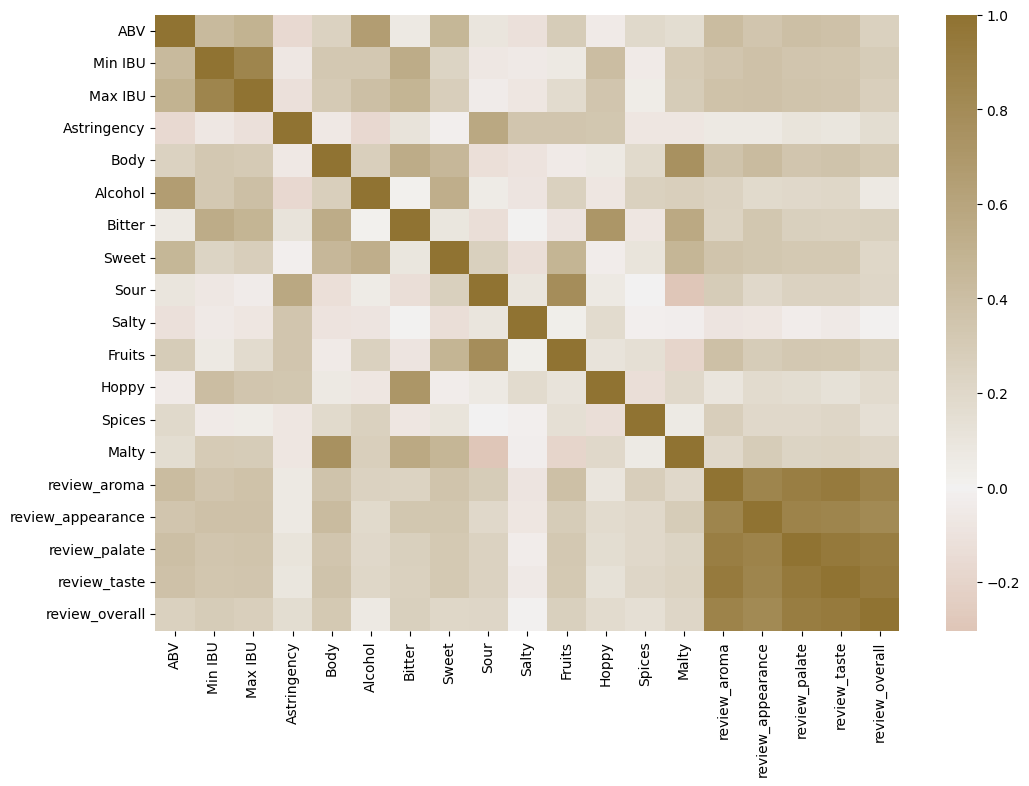

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt


fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)

cmap = sns.diverging_palette(30, 60, s=80, l=50, as_cmap=True)

sns.heatmap(df_filtered.corr(), ax=ax, cmap=cmap, center=0)

plt.show()

In [106]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ABV                3197 non-null   float64
 1   Min IBU            3197 non-null   int64  
 2   Max IBU            3197 non-null   int64  
 3   Astringency        3197 non-null   int64  
 4   Body               3197 non-null   int64  
 5   Alcohol            3197 non-null   int64  
 6   Bitter             3197 non-null   int64  
 7   Sweet              3197 non-null   int64  
 8   Sour               3197 non-null   int64  
 9   Salty              3197 non-null   int64  
 10  Fruits             3197 non-null   int64  
 11  Hoppy              3197 non-null   int64  
 12  Spices             3197 non-null   int64  
 13  Malty              3197 non-null   int64  
 14  review_aroma       3197 non-null   float64
 15  review_appearance  3197 non-null   float64
 16  review_palate      3197 

**Preparing Data for Training**
- X: Features (independent variables) are everything except the target variable.
- y: The target variable (dependent variable) is the overall review score.

In [117]:
X = df_filtered.drop('review_overall', axis=1)  # Features
y = df_filtered['review_overall']  # Target variable

**Splitting the Data**
* The data is split into training and testing sets, with 80% of the data for training and 20% for testing.
* random_state=1 ensures the results are reproducible.

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Creating and Training the Model

In [172]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Evaluate Model Performance**
- Mean Absolute Error (MAE): Average absolute differences between predicted and actual values.
- Mean Squared Error (MSE): Average squared differences between predicted and actual values.
- R² Score: Indicates how well the model explains the variability of the target variable (higher is better).

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Absolute Error: 0.08683755465353277
Mean Squared Error: 0.01928838028012514
R² Score: 0.9028212800586104


Visualizing Predictions

<ipython-input-170-e1f2106141bc>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', color='#825f39')


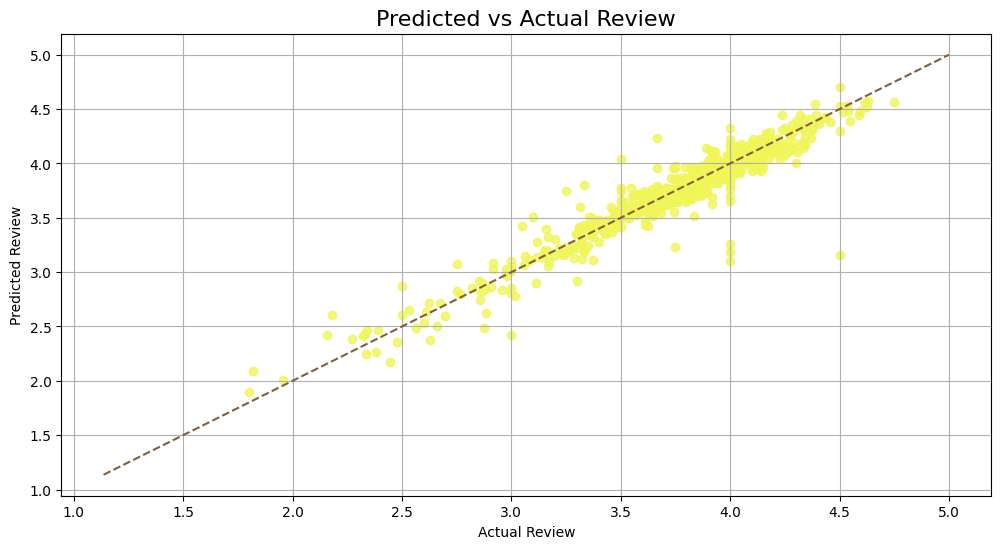

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.8, color='#f0f558')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', color='#825f39')
plt.title('Predicted vs Actual Review', fontsize=16, color="black")
plt.xlabel('Actual Review')
plt.ylabel('Predicted Review')
plt.grid()
plt.show()

In [114]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=1)
# model.fit(X_train, y_train)

# importance = pd.Series(model.feature_importances_, index=X_train.columns)
# print(importance.sort_values(ascending=False))


In [113]:
# from sklearn.model_selection import cross_val_score

# # List of features to drop
# features_to_drop = [
#     'Spices', 'Body', 'Bitter', 'Sour',
#     'Max IBU', 'Fruits', 'Min IBU', 'Salty'
# ]

# # Drop the features from the training and test datasets
# X_train_dropped = X_train.drop(columns=features_to_drop)
# X_test_dropped = X_test.drop(columns=features_to_drop)

# # Now, train your model with the updated datasets
# model_dropped = RandomForestRegressor()
# model_dropped.fit(X_train_dropped, y_train)

# # Make predictions and evaluate again
# y_pred_dropped = model_dropped.predict(X_test_dropped)
# mse_dropped = mean_squared_error(y_test, y_pred_dropped)
# r2_dropped = r2_score(y_test, y_pred_dropped)

# print(f'Model with Dropped Features MSE: {mse_dropped}')
# print(f'Model with Dropped Features R^2: {r2_dropped}')
# cv_scores = cross_val_score(model, X_train_dropped, y_train, cv=5)  # Change cv=5 to any number of folds you prefer
# print(f'Cross-Validation R^2 Scores: {cv_scores}')
# print(f'Mean Cross-Validation R^2: {cv_scores.mean()}')